In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import linregress
from numpy.linalg import inv
import operator
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Question 7ai)

In [ ]:
theta_7ai= np.dot(inv(np.dot(X_7ai.T,X_7ai)),np.dot(X_7ai.T,Y_7ai))

Question 7a)ii)

In [ ]:
theta_7aii = np.dot(inv(np.dot(X_7aii.T,X_7aii)+regularization_parameter*np.identity(number_j)),np.dot(X_7aii.T,Y_7aii))

Question 7a)iii)

In [2]:
def gradient_descent(x, y, initial_theta, regularization_parameter, loss_func, alpha=0.01, precision=0.001):
    loss = []
    theta = initial_theta
    all_thetas = [] # to store all thetas
    predictions = [] # to store all predictions
    number_of_steps = 0 
    previous_loss = 0
    prediction = np.dot(x,theta) #dot product
    error = prediction - y
    current_loss = loss_func(error,theta,regularization_parameter)
    predictions.append(prediction)
    loss.append(current_loss)
    all_thetas.append(theta)
    number_of_steps+=1
    while abs(current_loss - previous_loss) > precision: #if the difference between current and previous values of loss function is bigger than the precision we set
        previous_loss = current_loss #we update the value of the loss function to be the current value of loss function
        gradient = np.dot(x.T,error/np.size(y)) #new gradient
        theta = theta - alpha * gradient  #update theta
        all_thetas.append(theta)
        
        prediction = np.dot(x,theta)
        error = prediction - y
        current_loss = loss_func(error,theta,regularization_parameter)
        loss.append(current_loss)
        
    return all_thetas, loss, predictions

def loss_func(error,theta,regularization_parameter): #lasso loss
    return np.sum(error**2)+regularization_parameter*np.sum(np.abs(theta))

Question 7b)i) - analytical solution for least squares regression

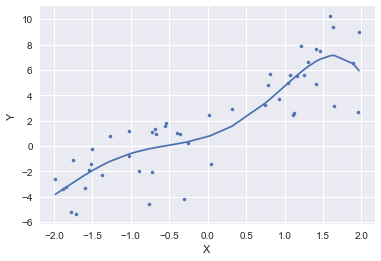

In [3]:
x=np.random.uniform(low=-2, high=2, size=(50,))
y=2+3*x+np.random.normal(0,2,50)

A=np.ones(50)
B=np.array((x))
C=np.array((x**2))
D=np.array((x**3))
E=np.array((x**4))
F=np.array((x**5))
matrix_x = np.column_stack((A,B,C,D,E,F))

theta_7bi= np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y))
y_analytical_solution=np.dot(matrix_x,theta_7bi)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_analytical_solution), key=sort_axis)
x_copy, y_analytical_zip = zip(*sorted_zip)
plt.plot(x_copy, y_analytical_zip)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Question 7b)ii) - analytical solution for ridge regression as function of the regularization parameter

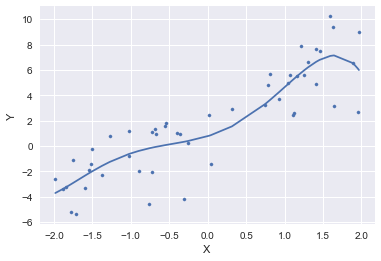

In [4]:
regularization_parameter=0.5

theta_7bii = np.dot(inv(np.dot(matrix_x.T,matrix_x)+regularization_parameter*np.identity(6)),np.dot(matrix_x.T,y))
y_ridge_regression=np.dot(matrix_x,theta_7bii)

plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_ridge_regression), key=sort_axis)
x_copy, y_ridge_zip = zip(*sorted_zip)
plt.plot(x_copy, y_ridge_zip)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Question 7b)iii) - batch gradient descent for lasso regression

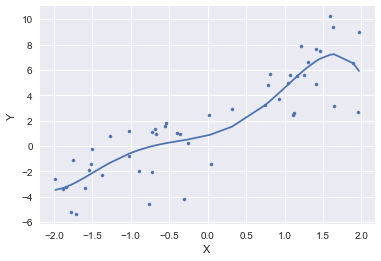

In [5]:
regularization_parameter=0.5

theta_i = np.random.rand(6)
all_thetas, loss, predictions = gradient_descent(matrix_x, y, theta_i, regularization_parameter, loss_func)

y_lasso_regression=np.dot(matrix_x,all_thetas[-1])
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_lasso_regression), key=sort_axis)
x_copy, y_lasso_zip = zip(*sorted_zip)
plt.plot(x_copy, y_lasso_zip)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Question 7c) – analytical solution for ridge regression

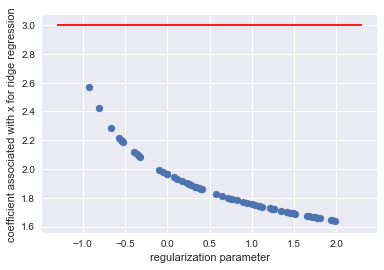

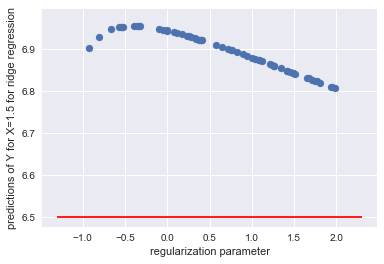

In [6]:
regularization_parameter=np.random.uniform(low=-1, high=2, size=(60,))
all_theta_7c_ridge=[]
coef_associated_with_x_ridge=[]
predictions_y_ridge=[]
x_vals = [1,1.5,2.25,3.375,5.0625,7.59375]
for q in range(60):
    theta_7c_ridge = np.dot(inv(np.dot(matrix_x.T,matrix_x)+regularization_parameter[q]*np.identity(6)),np.dot(matrix_x.T,y))
    all_theta_7c_ridge.append(theta_7c_ridge)

    coef_associated_with_x_ridge.append(all_theta_7c_ridge[q][1])

    predictions_y_ridge.append(np.dot(all_theta_7c_ridge[-1],x_vals))
    
plt.scatter(regularization_parameter,coef_associated_with_x_ridge)
plt.xlabel('regularization parameter')
plt.ylabel('coefficient associated with x for ridge regression')
plt.hlines(y=3,xmin=-1.3,xmax=2.3,color='red')
plt.show()

plt.scatter(regularization_parameter,predictions_y_ridge)
plt.xlabel('regularization parameter')
plt.ylabel('predictions of Y for X=1.5 for ridge regression')
plt.hlines(y=6.5,xmin=-1.3,xmax=2.3,color='red')
plt.show()

Question 7c) batch gradient descent optimization for lasso regression

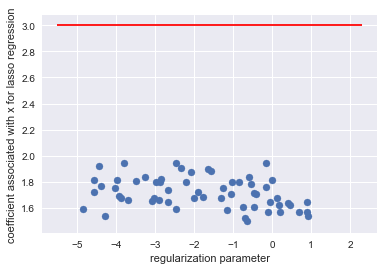

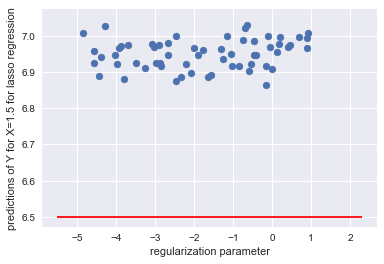

In [7]:
regularization_parameter=np.random.uniform(low=-5, high=1, size=(60,))
all_theta_7c_lasso=[]
coef_associated_with_x_lasso=[]
predictions_y_lasso=[]
x_vals = [1,1.5,2.25,3.375,5.0625,7.59375]
for q in range(60):
    theta_i = np.random.rand(6)
    all_thetas, loss, predictions = gradient_descent(matrix_x, y, theta_i, regularization_parameter[q], loss_func)
    coef_associated_with_x_lasso.append(all_thetas[-1][1])
    
    predictions_y_lasso.append(np.dot(all_thetas[-1],x_vals))
    
plt.scatter(regularization_parameter,coef_associated_with_x_lasso)
plt.xlabel('regularization parameter')
plt.ylabel('coefficient associated with x for lasso regression')
plt.hlines(y=3,xmin=-5.5,xmax=2.3,color='red')
plt.show()

plt.scatter(regularization_parameter,predictions_y_lasso)
plt.xlabel('regularization parameter')
plt.ylabel('predictions of Y for X=1.5 for lasso regression')
plt.hlines(y=6.5,xmin=-5.5,xmax=2.3,color='red')
plt.show()

### For analytical solution for ridge regression, parameters are bigger when regularization parameter is negative (overestimation). When regularization parameter gets bigger or positive, parameters get exponentially smaller and asymptotically approach the true value. 

### For batch gradient descent using Lasso regression, the parameters are overestimated for negative/small positive regularization parameter. As the regularization parameter gets bigger, the parameter and slope approach the true value.

Question 7d)i – analytical solution for least squares

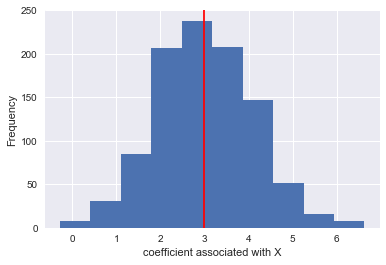

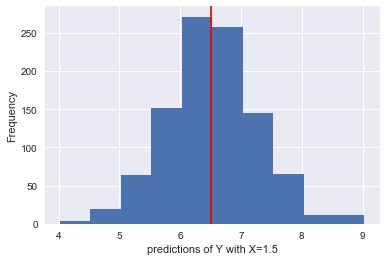

In [8]:
coef_with_x_7di = []
all_theta_7d_least_sq=[]
predictions_y_7di=[]
x_vals = [1,1.5,2.25,3.375,5.0625,7.59375]
for w in range(1000):
    x=np.random.uniform(low=-2, high=2, size=(50,))
    y=2+3*x+np.random.normal(0,2,50)
    A=np.ones(50)
    B=np.array((x))
    C=np.array((x**2))
    D=np.array((x**3))
    E=np.array((x**4))
    F=np.array((x**5))
    matrix_x = np.column_stack((A,B,C,D,E,F))
    theta_7di= np.dot(inv(np.dot(matrix_x.T,matrix_x)),np.dot(matrix_x.T,y))
    all_theta_7d_least_sq.append(theta_7di)
    
    coef_with_x_7di.append(all_theta_7d_least_sq[w][1])
    
    predictions_y_7di.append(np.dot(all_theta_7d_least_sq[-1],x_vals))
    
plt.hist(coef_with_x_7di)
plt.xlabel('coefficient associated with X')
plt.ylabel('Frequency')
plt.axvline(x=3.0, color='red')
plt.show()

plt.hist(predictions_y_7di)
plt.xlabel('predictions of Y with X=1.5')
plt.ylabel('Frequency')
plt.axvline(x=6.5, color='red')
plt.show()

Unbiased but large variance.

Question 7d)ii – analytical solution for ridge regression

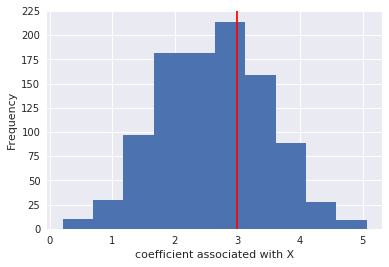

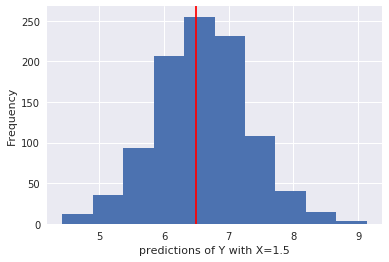

In [17]:
coef_with_x_7dii = []
all_theta_7d_ridge=[]
predictions_y_7dii=[]
x_vals = [1,1.5,2.25,3.375,5.0625,7.59375]
for w in range(1000):
    x=np.random.uniform(low=-2, high=2, size=(50,))
    y=2+3*x+np.random.normal(0,2,50)
    A=np.ones(50)
    B=np.array((x))
    C=np.array((x**2))
    D=np.array((x**3))
    E=np.array((x**4))
    F=np.array((x**5))
    matrix_x = np.column_stack((A,B,C,D,E,F))
    theta_7d_ridge = np.dot(inv(np.dot(matrix_x.T,matrix_x)+0.5*np.identity(6)),np.dot(matrix_x.T,y))
    all_theta_7d_ridge.append(theta_7d_ridge)
    
    coef_with_x_7dii.append(all_theta_7d_ridge[w][1])
    
    predictions_y_7dii.append(np.dot(all_theta_7d_ridge[-1],x_vals))
    
plt.hist(coef_with_x_7dii)
plt.xlabel('coefficient associated with X')
plt.ylabel('Frequency')
plt.axvline(x=3.0, color='red')
plt.show()

plt.hist(predictions_y_7dii)
plt.xlabel('predictions of Y with X=1.5')
plt.ylabel('Frequency')
plt.axvline(x=6.5, color='red')
plt.show()

A bit biased to the left (underestimation) and big variance.

Question 7diii bath gradient descent for Lasso

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


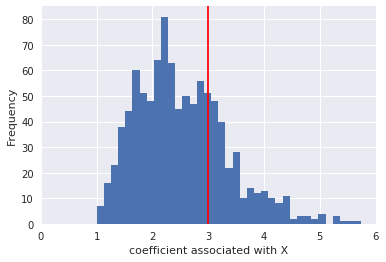

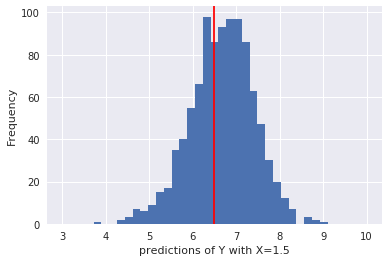

In [18]:
coef_with_x_7diii = []
all_theta_7d_lasso=[]
predictions_y_7diii=[]
x_vals = [1,1.5,2.25,3.375,5.0625,7.59375]
for w in range(1000):
    x=np.random.uniform(low=-2, high=2, size=(50,))
    y=2+3*x+np.random.normal(0,2,50)
    A=np.ones(50)
    B=np.array((x))
    C=np.array((x**2))
    D=np.array((x**3))
    E=np.array((x**4))
    F=np.array((x**5))
    matrix_x = np.column_stack((A,B,C,D,E,F))
    theta_i = np.random.rand(6)
    all_thetas, loss, predictions = gradient_descent(matrix_x, y, theta_i, 0.5, loss_func)
    coef_with_x_7diii.append(all_thetas[-1][1])
    
    predictions_y_7diii.append(np.dot(all_thetas[-1],x_vals))
    
plt.hist(coef_with_x_7diii, bins=np.linspace(1,6,40))
plt.xlabel('coefficient associated with X')
plt.ylabel('Frequency')
plt.xlim([0,6])
plt.axvline(x=3.0, color='red')
plt.show()

plt.hist(predictions_y_7diii, bins=np.linspace(3,10,40))
plt.xlabel('predictions of Y with X=1.5')
plt.ylabel('Frequency')
plt.axvline(x=6.5, color='red')
plt.show()

The graphs show a large variance. It is also biased towards underestimating both the slope of the X term.